In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.datasets import cifar10

2024-03-16 06:52:19.594499: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-16 06:52:19.594586: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-16 06:52:19.752689: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
# Preprocess CIFAR-10 dataset
(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [17]:
class Row_LSTM(Model):
    def __init__(self):
        super(Row_LSTM, self).__init__()
        self.conv2d = layers.Conv2D(64, (3, 3), padding='same', activation='relu')
        self.reshape = layers.Reshape((32, 32 * 64)) 
        self.lstm = layers.LSTM(256, return_sequences=True)
        self.dropout = layers.Dropout(0.5)
        self.flatten = layers.Flatten()
        self.dense1 = layers.Dense(512, activation='relu')
        self.dense2 = layers.Dense(32 * 32 * 3, activation='sigmoid')

    def call(self, inputs):
        x = self.conv2d(inputs)
        x = self.reshape(x)
        x = self.lstm(x)
        x = self.dropout(x)
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        return tf.reshape(x, [-1, 32, 32, 3])

In [18]:
model = Row_LSTM()
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.fit(x_train, x_train, batch_size=64, epochs=30, validation_split=0.2)


Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.5750 - loss: 0.0253 - val_accuracy: 0.6925 - val_loss: 0.0076
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.7154 - loss: 0.0067 - val_accuracy: 0.7337 - val_loss: 0.0049
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.7372 - loss: 0.0046 - val_accuracy: 0.7379 - val_loss: 0.0038
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.7559 - loss: 0.0036 - val_accuracy: 0.7619 - val_loss: 0.0032
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.7674 - loss: 0.0031 - val_accuracy: 0.7784 - val_loss: 0.0029
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.7762 - loss: 0.0028 - val_accuracy: 0.7806 - val_loss: 0.0027
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.7813 - loss: 0.0026 - val_accuracy: 0.7843 - val_loss: 0.0026
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.7859 - loss: 0.0025 - 

In [19]:
generated_images = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [20]:
generated_images = np.clip(generated_images, 0, 1)


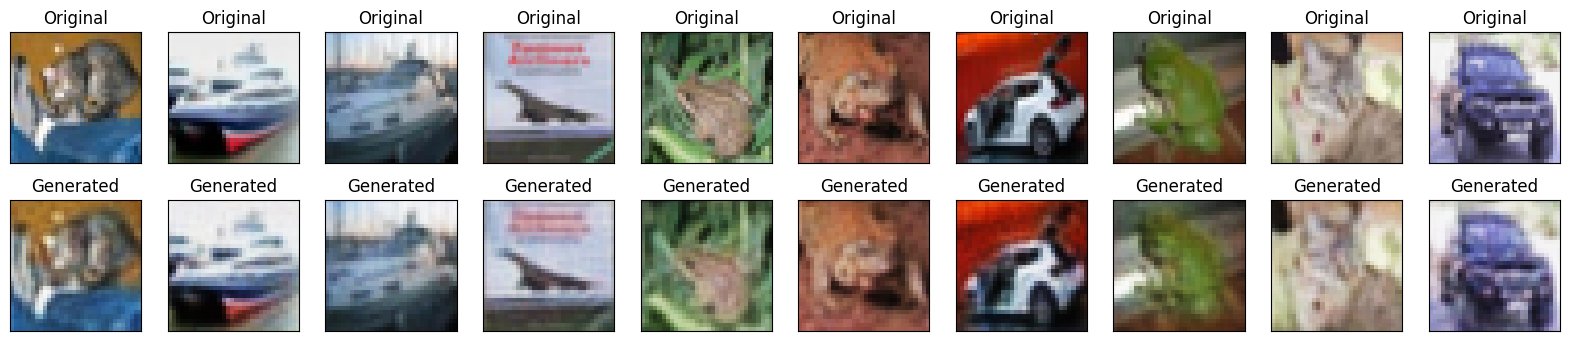

In [21]:
import matplotlib.pyplot as plt

# Display the generated images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(generated_images[i])
    plt.title("Generated")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [22]:
import numpy as np

def calculate_log_likelihood(images, model):
    # Predict probabilities for all images at once
    probabilities = model.predict(images)

    # Calculate log likelihoods for all images at once
    log_likelihoods = -np.mean(np.log(probabilities), axis=(1, 2, 3))
    
    # Return the mean log likelihood
    return np.mean(log_likelihoods)

# Calculate log likelihood for generated images
log_likelihood = calculate_log_likelihood(generated_images, model)
print("Log Likelihood:", log_likelihood)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Log Likelihood: 0.93091804
